<b>Project 1 - Part 2</b>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

<b>Read adverstisement samples file</b>

In [25]:
dataset = pd.read_csv("Ads_Optimisation.csv")
print(dataset.head())

runtime_rewards = dataset.to_numpy()

true_rewards = np.mean(runtime_rewards, axis=0)
runtime_rewards = runtime_rewards.transpose()

steps = runtime_rewards.shape[1]

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


<b>Plot mean advertisement selection<b>

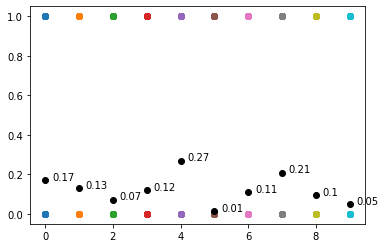

In [26]:
action_indices = np.arange(0,10)
for index in action_indices :
    plt.scatter(np.full((10000),index),runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices, true_rewards,'o', color='black')
plt.show()

<b>Number of advertisements / similar to number of leavers in Bandit machine problem</b>

In [27]:
def reward_calculator(epsilon):
    N = 10000
    d = 10
    ads_selected = []
    # keep track of how many times actions are taken
    numbers_of_selections = [1] * d
    sums_of_reward = [0] * d
    # keep track of total reward (q function)
    total_reward = 0

    for n in range(0, N):
        ad = 0
        max_q_value = 0
        for i in range(0, d):
            rand = np.random.uniform(0, 1) 
            if rand <= epsilon:
                ad = random.randrange(d)
            else:
                # calculate q(a) or avg reward of all rewards for choosing ad i divided by number of times choosing ad i
                q_val = sums_of_reward[i] / numbers_of_selections[i]
                if q_val > max_q_value:
                    max_q_value = q_val
                    ad = i   
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_reward[ad] += reward
        total_reward += reward

    return total_reward, ads_selected

<b>Plot the best advertisement selection and top rewards for different values of epsilon</b>

Eplison: 0.0, Best Advt: 1, Rewards: 1703
Eplison: 0.01, Best Advt: 5, Rewards: 2464
Eplison: 0.1, Best Advt: 5, Rewards: 2059
Eplison: 0.2, Best Advt: 5, Rewards: 1724
Eplison: 0.5, Best Advt: 8, Rewards: 1322
Eplison: 0.7, Best Advt: 9, Rewards: 1208
Eplison: 0.8, Best Advt: 10, Rewards: 1224
Eplison: 0.9, Best Advt: 10, Rewards: 1191


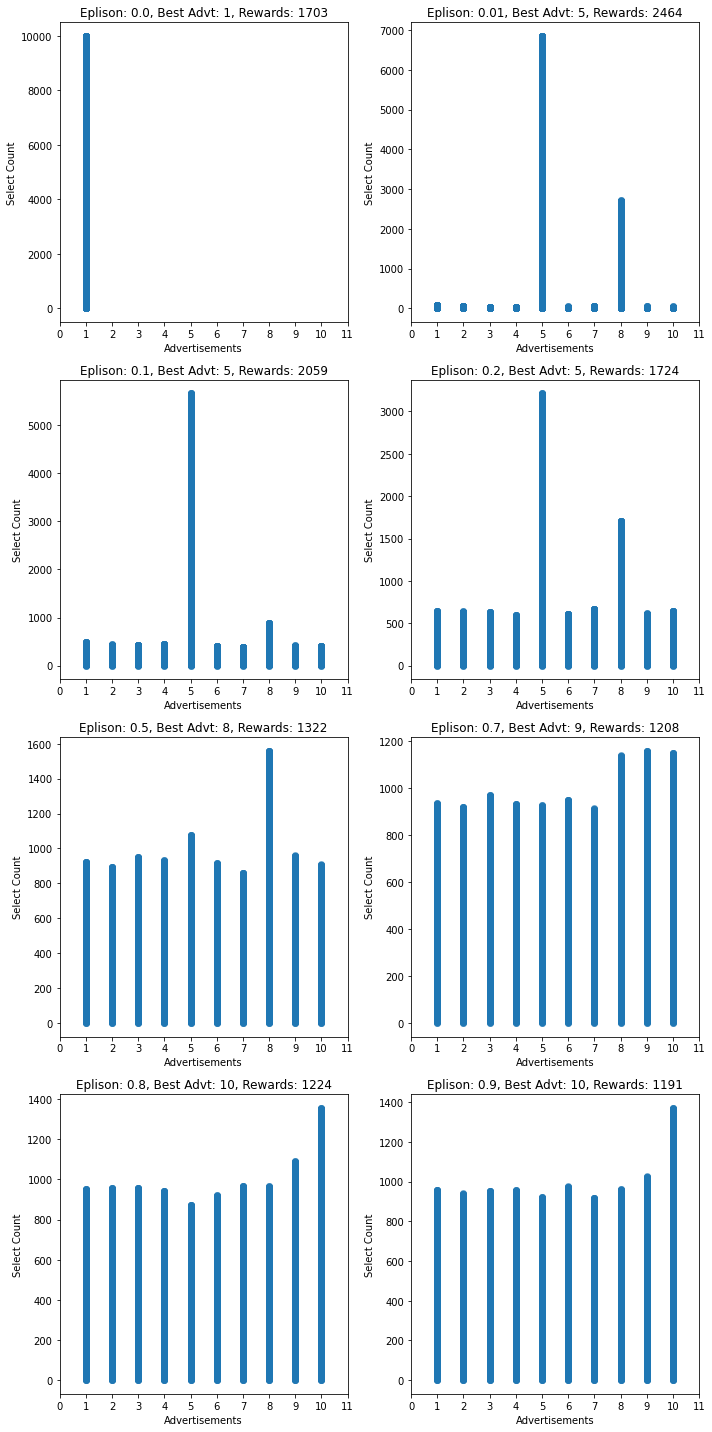

In [28]:
epsilons = [0.0, 0.01, 0.1, 0.2, 0.5, 0.7, 0.8, 0.9]

fig, axs = plt.subplots(4, 2, figsize=(10,20))

axs_row = 0
axs_col = 0
for index, epsilon in enumerate(epsilons):
    epsilon_result, ads_selected = reward_calculator(epsilon)
    
    df = pd.DataFrame(data=ads_selected, columns=['A'])
    df['A'] = df['A'].apply(lambda x: x + 1)
    df['C'] = df.groupby('A')['A'].cumcount()
    df.sort_values(by=['C', 'A'], inplace=True, ascending=False)
    
    axs[axs_row][axs_col].set(xlabel="Advertisements", ylabel="Select Count")
    axs[axs_row][axs_col].scatter(df['A'], df['C'], alpha=0.5)
    axs[axs_row][axs_col].title.set_text("Eplison: " + str(epsilon) + ", Best Advt: " + str(df.iloc[0]['A']) + ", Rewards: " + str(epsilon_result))
    
    print("Eplison: " + str(epsilon) + ", Best Advt: " + str(df.iloc[0]['A']) + ", Rewards: " + str(epsilon_result))

    if axs_col + 1 >= 2 :
        axs_col = 0
        axs_row = axs_row + 1
    else:
        axs_col += 1

plt.setp(axs, xticks=[0,1,2,3,4,5,6,7,8,9,10,11])
fig.tight_layout()
plt.show()